In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing all necessary packages and files
import argparse
from ConfigParser import SafeConfigParser
import os
from numpy import *
from IPython.display import Image

#image generator is used to simulate an image to sample
import image_generator.image_generator as ig

#multimodal nested sampling and self organizing map is used to sample the simulated image.
import model_nest_som.model_nest_som as ns

#finding clusters in sampled data
import post_sampling.post_sampling as ps

import timeit

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [4]:
#set the prefix for the run
prefix = 1


In [5]:
#accessing the configuration file
parser = SafeConfigParser()
parser.read("config.ini")

output_dir = parser.get("Misc", "location") + "/" + str(prefix)
os.system('mkdir -p ' + output_dir)

0

In [6]:
#change prefix and write
parser.set("Misc","prefix",str(prefix))

#setting plot to false to displable plotting after every 500 iteration
parser.set("Output", "plot","False")
fileout = "files"+"/"+str(prefix)+"/"+'config'+'_'+str(prefix)+'.ini'
F = open(fileout,'w')
parser.write(F)
F.close()

In [7]:
#simulating a 200*200 pixel image
start1 = timeit.default_timer()
ig.run(fileout)
stop1 = timeit.default_timer()

In [8]:
#sampling the image using multimodal nested sampling and self-organizing map 
#self organizing map is used to better inform the sampler the location to sample in by identifying areas of 
#higher likelihood and increasing the probability of the samplerto cover those regions.

start2 = timeit.default_timer()
ns.run(fileout)
stop2 = timeit.default_timer()

done with active
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
121073 Log evaluations
wrote to file: files/1/1_processed_detected.txt
wrote to file: files/1/1_all_detected.txt


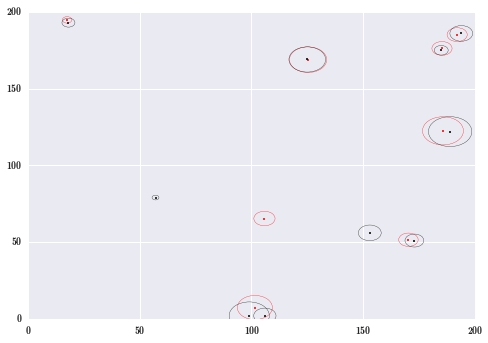

TP:  7 FP:  1 Undetected:  3


In [9]:
#working with the sampled data to fetch objects
#clustering methods are used to identify sources of high likehood.
start3 = timeit.default_timer()
plt = ps.run(fileout)

stop3 = timeit.default_timer()

In [10]:
#calculating the overall time taken
print "Time taken", (stop1 - start1) + (stop2 - start2) + (stop3 - start3), 'seconds'

Time taken 509.831403017 seconds
